# Title

**Exercise 2 - Simple k-NN Classification and Logistic Regression**

# Description
The aim of this exercise is to fit, interpret, predict, score, and plot simple $k$-NN classification and logistic regression models using the `sklearn` package.

In the end, you should get a plot that looks like this (way too busy for publication, but OK here for teaching purposes):

<img src="img/simple_knn_log_reg.png" style="width: 500px;">

# Dataset Description:

The dataset used here is called the Heart dataset. This dataset has several predictors such as `Age`, `Sex`, and `MaxHR`, etc.  For now, we will just use `Age` to predict whether or not someone has atherosclerotic heart disease (AHD).

# Instructions:
1. Read the `Heart.csv` file into a pandas data frame.
2. Split the dataset into train and validation sets, with 80% of the data for training
3. Assign the predictor and response variables. Remember the aim is to predict whether a patient has `AHD`
4. Fit a $k$-NN model (manually tuned) to the dataset and look at some predictions.
5. Fit a logistic regression model to the dataset and interpret the coefficients. 
6. Do some work mathematically based on the estimated model.
7. Compute and print the train and validation accuracies for both
8. Plot the predictions on the scatterplot.

# Hints:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html" target="_blank">sklearn.KNeighborsClassifier()</a> : Generates a $k$-NN classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression()</a> : Generates a Logistic Regression classifier

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.fit" target="_blank">sklearn.fit()</a> : Fits the model to the given data

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict" target="_blank">sklearn.predict()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform pure classification predictions

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba" target="_blank">sklearn.predict_proba()</a> : Predict using the estimated model (Logistic or knn classifiers) to perform probability predictions of all the classes in the response (they should add up to 1 for each observation)

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html" target="_blank">sklearn.LogisticRegression.coef_ and .intercept_</a> : Pull off the estimated $\beta$ coefficients in a Logistic Regression model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.score" target="_blank">sklearn.score()</a> : Accuracy classification score.

**Note: This exercise is auto-graded and you can try multiple attempts.**

In [54]:
# import libraries
import math
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 

### Read-in the dataset

In [43]:
# Read the "Heart.csv" dataset and take a quick look
heart = pd.read_csv('data/heart.csv')


# Force the response into a binary indicator:
heart['AHD'] = 1*(heart['AHD'] == "Yes")

print(heart.shape)

(303, 15)


In [44]:
# split into train and validation
heart_train, heart_val = train_test_split(heart, train_size = 0.75, random_state = 109)

print(heart_train.shape, heart_val.shape)

(227, 15) (76, 15)


### $k$-NN model fitting

Define and fit a $k$-NN classification model with $k=20$ to predict `AHD` from `Age`.

In [45]:
# select variables for model estimation: be careful of format 
# (aka, single or double square brackets)
x_train = heart_train[["Age"]]
y_train = heart_train["AHD"]

# define the model
knn20 = KNeighborsClassifier(n_neighbors=20)

# fit to the data
knn20.fit(x_train , y_train)


KNeighborsClassifier(n_neighbors=20)

### $k$-NN prediction

Perform some simple predictions: both the pure classifications and the probability estimates.

In [46]:
### edTest(test_knn) ###

# there are two types of predictions in classification models in sklearn
# model.predict for pure classifications, and model.predict_proba for probabilities

# create the predictions based on the train data
yhat20_class = knn20.predict(x_train)
yhat20_prob = knn20.predict_proba(x_train)

# print out the first 10 predictions for the actual data
print(yhat20_class[1:10])
print(yhat20_prob[1:10])

[0 1 1 1 0 0 1 0 1]
[[0.75 0.25]
 [0.3  0.7 ]
 [0.25 0.75]
 [0.3  0.7 ]
 [0.65 0.35]
 [0.5  0.5 ]
 [0.3  0.7 ]
 [0.55 0.45]
 [0.35 0.65]]


What do you notice about the probability estimates?  Which 'column' is which?  How could you manually create `yhat20_class` from `yhat20_prob`? 

*Your answer here*, p=1 for each line.

### Simple logisitc regression model fitting

Define and fit a $k$-NN classification model with $k=20$ to predict `AHD` from `Age`.

In [47]:
### edTest(test_logit) ###
# Create a logistic regression model, with 'none' as the penalty

logit1 = LogisticRegression(penalty="none", max_iter = 1000)

#Fit the model using the training set

logit1.fit(x_train,y_train)

# Get the coefficient estimates

print("Logistic Regression Estimated Betas (B0,B1):",logit1.intercept_[0],logit1.coef_[0][0])


Logistic Regression Estimated Betas (B0,B1): -3.3261670337310845 0.05933142048457174


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


### Interpret the Coefficient Estimates

Write down the logistic regression model below (edit the provided latex formula).  Use this formula to answer: 

What is the estimated odds that a 60 year old will have AHD in the ICU?  What is the probability?

$$ \ln\left(  \frac{P(Y=1)}{1-P(Y=1)} \right) = \hat{\beta}_0 + \hat{\beta}_1 X$$

*your answer here
B0 = -3.3261670337310845
B1 = 0.05933142048457174
probability_AHD = 1 / (1 + math.exp(-(B0 + B1 * age)))
*

In [55]:
# Make the predictions on the training & validation set
# Be careful as to how you define the new observation.  Hint: double brackets is one way to do it


B0 = -3.3261670337310845
B1 = 0.05933142048457174
probability_AHD = 1 / (1 + math.exp(-(B0 + B1 * 60)))
print("The probability is: ", probability_AHD)

pred_v = logit1.predict([[60]])

print("Prediction ", pred_v[:])



The probability is:  0.5581650214464884
Prediction  [1]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### Accuracy computation

### $k$-NN and logistic accuracy

In [49]:
### edTest(test_accuracy) ###

# Define the equivalent validation variables from `heart_val`

x_val = heart_val[["Age"]]
y_val = heart_val["AHD"]

# Compute the training & validation accuracy using the estimator.score() function

knn20_train_accuracy = knn20.score(x_train, y_train)
knn20_val_accuracy = knn20.score(x_val, y_val)

logit_train_accuracy = logit1.score(x_train, y_train)
logit_val_accuracy = logit1.score(x_val, y_val)

# Print the accuracies below

print("k-NN Train & Validation Accuracy:", knn20_train_accuracy, knn20_val_accuracy)
print("Logisitic Train & Validation Accuracy:", logit_train_accuracy, logit_val_accuracy)




k-NN Train & Validation Accuracy: 0.6563876651982379 0.6052631578947368
Logisitic Train & Validation Accuracy: 0.6387665198237885 0.6052631578947368


### Plot the predictions

Use a 'dummy' x variable for plotting for the two different models.  Here we plot the train and validation data separately, and the 4 different types of predictions (2 for each model: pure classification and probability estimation)

           Age
0    19.000000
1    19.341709
2    19.683417
3    20.025126
4    20.366834
..         ...
195  85.633166
196  85.974874
197  86.316583
198  86.658291
199  87.000000

[200 rows x 1 columns]
[0.09985201 0.10168911 0.10355613 0.1054534  0.10738126 0.10934007
 0.11133015 0.11335184 0.11540547 0.11749138 0.1196099  0.12176134
 0.12394604 0.1261643  0.12841644 0.13070277 0.1330236  0.13537922
 0.13776992 0.140196   0.14265773 0.14515538 0.14768924 0.15025955
 0.15286657 0.15551054 0.15819171 0.16091029 0.16366651 0.16646058
 0.16929268 0.17216303 0.17507178 0.1780191  0.18100516 0.18403009
 0.18709403 0.19019709 0.19333937 0.19652097 0.19974196 0.2030024
 0.20630235 0.20964182 0.21302085 0.21643943 0.21989753 0.22339514
 0.22693219 0.23050863 0.23412436 0.23777928 0.24147327 0.24520618
 0.24897786 0.25278812 0.25663677 0.26052358 0.26444832 0.26841072
 0.27241051 0.27644738 0.280521   0.28463104 0.28877713 0.29295888
 0.29717588 0.3014277  0.3057139  0.310034   0.3143875  0.31

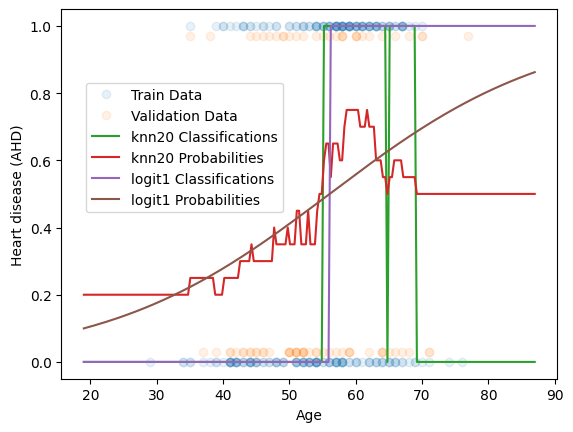

In [50]:

# set-up the dummy x for plotting: we extend it a little bit beyond the range of observed values 
x = np.linspace(np.min(heart[['Age']])-10,np.max(heart[['Age']])+10,200)

x_df = pd.DataFrame(x, columns=['Age'])
print(x_df)

# be careful in pulling off only the correct column of the probability calculations: use `[:,1]`
yhat_class_knn20 = knn20.predict(x_df)
yhat_prob_knn20 = knn20.predict_proba(x_df)[:, 1]

yhat_class_logit = logit1.predict(x_df)
yhat_prob_logit = logit1.predict_proba(x_df)[:, 1]

print(yhat_prob_logit)


# plot the observed data.  Note: we offset the validation points to make them more clearly differentiated from train
plt.plot(x_train, y_train, 'o' ,alpha=0.1, label='Train Data')
plt.plot(x_val, 0.94*y_val+0.03, 'o' ,alpha=0.1, label='Validation Data')

# plot the predictions
plt.plot(x, yhat_class_knn20, label='knn20 Classifications')
plt.plot(x, yhat_prob_knn20, label='knn20 Probabilities')
plt.plot(x, yhat_class_logit, label='logit1 Classifications')
plt.plot(x, yhat_prob_logit, label='logit1 Probabilities')

# put the lower-left part of the legend 5% to the right along the x-axis, and 45% up along the y-axis
plt.legend(loc=(0.05,0.45))

# Don't forget your axis labels!
plt.xlabel("Age")
plt.ylabel("Heart disease (AHD)")

plt.show()


### Post exercise questions

1. Describe the estimated associations between AHD and Age based on these two models.

*Your answer here*

2. Which model apears to be more overfit to the training data?  How do you know?  How can this be resolved?

*Your answer here*

3. How could you engineer features for the logistic regression model so that the association between AHD and Age resembles the general trend in the knn20 model more similarly?

*Your answer here*

In [51]:
# Your answer here

4. Refit the models above to predict `AHD` from 3 predictors (please also play around with $k$):
```{python}
['MaxHR','Age','Sex']
```
Investigate the associations in each of the two models and evaluate the predictive accuracy of each of these models

In [52]:
# Your answer here